In [1]:
# SVR : non linear modle for regression
# doesn't do automatic feature scaling like (Linear regression, polynomial regression), because it's not popular

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# reading the data
data = pd.read_csv('data/Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
# general exploration about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [5]:
# get IV and DV
IV = data.iloc[:,1]
DV= data.iloc[:,-1]

In [6]:
# Feature Scaling: because SVR doesn't do autmatic feature scaling
from sklearn.preprocessing import StandardScaler
# we always do scaler for DV and one for IV 
IV_sc=StandardScaler()
DV_sc=StandardScaler()
IV = IV_sc.fit_transform(np.array(IV).reshape(-1,1))
DV = DV_sc.fit_transform(np.array(DV).reshape(-1,1))

C:\Users\Hamdy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
# bulding a regression model
# SVM conatin two classes (Support Vector Regression(SVR),Support Vector Classification(SVC))
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(IV,DV)

C:\Users\Hamdy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [8]:
# scale the IV 
IV_pred_scaled = IV_sc.transform(np.array(6.5).reshape(-1,1))
DV_pred_scaled = regressor.predict(IV_pred_scaled)
DV_pred = DV_sc.inverse_transform(DV_pred_scaled)
DV_pred

array([170370.0204065])

In [9]:
# visualization function
def visualize(actual_x, actual_y,regressor):
    plt.scatter(actual_x,actual_y,color='red')
    plt.plot(actual_x,regressor.predict(np.array(actual_x).reshape(-1,1)))
    plt.xlabel('Level (position)')
    plt.ylabel('Salary')
    plt.title('Position Vs salary')
    plt.show()

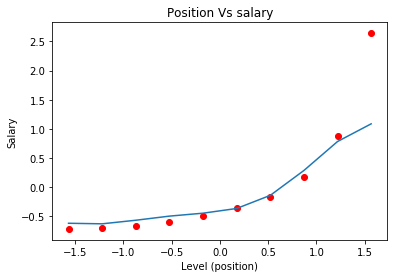

In [10]:
visualize(IV,DV,regressor)

# Done :) 